In [4]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

import tensorflow.keras.utils as ku
import numpy as np

In [2]:
bdir = 'D:\\Other\\datasets\\'
import gdown
gdown.download(id='108jAePKK4R3BVYBbYJZ32JWUwxeMg20K', output=bdir)

Downloading...
From: https://drive.google.com/uc?id=108jAePKK4R3BVYBbYJZ32JWUwxeMg20K
To: D:\Other\datasets\sonnets.txt
100%|██████████| 93.6k/93.6k [00:00<00:00, 279kB/s]


'D:\\Other\\datasets\\sonnets.txt'

In [3]:
tokenizer = Tokenizer()
data = open(bdir+'sonnets.txt').read()
corpus = data.lower().split('\n')

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(
    input_sequences, maxlen=max_sequence_len, padding='pre'
))

predictors, label = input_sequences[:,:-1], input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [5]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1 ))
model.add(Bidirectional(LSTM(150, return_sequences=True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(total_words, activation='softmax'))

In [6]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321100    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 10, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1605)              162105    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
______________________________________________

In [11]:
history = model.fit(predictors, label, epochs=50, verbose=1)

Epoch 1/50
484/484 [==============================] - 11s 23ms/step - loss: 5.6532 - accuracy: 0.0633

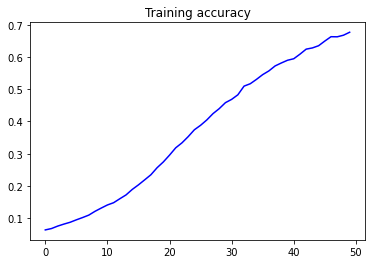

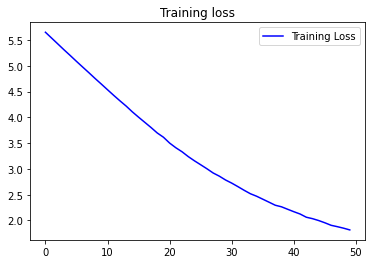

In [12]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()


In [13]:
rev_index = {}
for word, index in tokenizer.word_index.items():
    rev_index[index] = word

In [15]:
seed_text = "The quick brown fox jumped over the"
next_words = 10

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1,
                               padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    seed_text += " " + rev_index[int(predicted)]
    print(seed_text)

d:\users\i\pycharmprojects\pythonproject\venv\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


The quick brown fox jumped over the satire
The quick brown fox jumped over the satire to
The quick brown fox jumped over the satire to me
The quick brown fox jumped over the satire to me decays
The quick brown fox jumped over the satire to me decays afford
The quick brown fox jumped over the satire to me decays afford hate
The quick brown fox jumped over the satire to me decays afford hate '
The quick brown fox jumped over the satire to me decays afford hate ' part
The quick brown fox jumped over the satire to me decays afford hate ' part prove
The quick brown fox jumped over the satire to me decays afford hate ' part prove thee
